## Load data. Find pareto optimal points

In [64]:
import pandas as pd
import numpy as np
from autooed.utils.pareto import check_pareto, convert_minimization

# Load the data from the CSV files
features = pd.read_csv('files/features.csv', header=None)
target = pd.read_csv('files/target.csv', header=None)

# Concatenate the feature and target DataFrames along the column axis
combined_data = pd.concat([features, target], axis=1)

# Define column names
combined_data.columns =  ['time, min', 'gas, m/s', 'power, W', 'speed, mm/s', 'hatchspacing, mkm',
                          'Energy', 'angle, degree', 'Mean_hardness, HV', 'porosity, %']

# Set the first column to be maximized and the second to be minimized
objective_type = ['max', 'min']

# Convert the data for maximization problems to minimization
target_data = combined_data[['Mean_hardness, HV', 'porosity, %']].values

# Check Pareto optimality
pareto_optimal = check_pareto(target_data, obj_type=objective_type)

# Add pareto column to the DataFrame
combined_data['pareto'] = np.where(pareto_optimal, 1, 0)
combined_data

,"time, min","gas, m/s","power, W","speed, mm/s","hatchspacing, mkm",Energy,"angle, degree","Mean_hardness, HV","porosity, %",pareto
0,1,2.5,79.0,490.0,70.0,115.160350,0.0,213.700000,0.0840,0
1,1,2.5,79.0,490.0,70.0,115.160350,90.0,211.233333,0.1400,0
2,1,2.5,79.0,490.0,70.0,115.160350,150.0,207.666667,0.2900,0
3,1,2.5,79.0,490.0,80.0,100.765306,0.0,209.633333,0.2300,0
4,1,2.5,79.0,490.0,80.0,100.765306,90.0,209.733333,0.2200,0
...,...,...,...,...,...,...,...,...,...,...
631,2,3.5,124.0,575.0,87.0,123.938031,47.0,224.666667,0.0570,0
632,2,3.5,163.0,616.0,71.0,186.345345,51.0,216.333333,0.0013,0
633,2,3.5,138.0,914.0,92.0,82.056893,30.0,228.666667,0.0074,0
634,2,3.5,153.0,558.0,96.0,142.809140,37.0,225.666667,0.0320,0


## Cost consideration

In [65]:
def operating_cost(row): 
    ss = row['speed, mm/s'] # scanning speed, mm/s
    h = row['hatchspacing, mkm']/1000 # hatch distance, mm
    t = 0.02 # thickeness, mm

    V = 8*8*10 # sample volume, mm3
    Tl = 5 # recoating time, sec
    H = 10 # height of part, mm
    Cmc = 40 # hourly operating cost $RUB/h
    Emc = 3.244 # energy consupmtion by machine, kW
    Ce = 0.1376 # electricity rate  $RUB/kWh

    Cost = (V/(ss*h*t)+H/t*Tl*Cmc/3600)+(V/(ss*h*t)+H/t*Tl)*Emc*Ce/3600
    return Cost #machine operating cost, $RUB/sample

# Applying the function and creating the 'cost' column
combined_data['cost'] = combined_data.apply(operating_cost, axis=1)
combined_data

,"time, min","gas, m/s","power, W","speed, mm/s","hatchspacing, mkm",Energy,"angle, degree","Mean_hardness, HV","porosity, %",pareto,cost
0,1,2.5,79.0,490.0,70.0,115.160350,0.0,213.700000,0.0840,0,961.148045
1,1,2.5,79.0,490.0,70.0,115.160350,90.0,211.233333,0.1400,0,961.148045
2,1,2.5,79.0,490.0,70.0,115.160350,150.0,207.666667,0.2900,0,961.148045
3,1,2.5,79.0,490.0,80.0,100.765306,0.0,209.633333,0.2300,0,844.515509
4,1,2.5,79.0,490.0,80.0,100.765306,90.0,209.733333,0.2200,0,844.515509
...,...,...,...,...,...,...,...,...,...,...,...
631,2,3.5,124.0,575.0,87.0,123.938031,47.0,224.666667,0.0570,0,667.847236
632,2,3.5,163.0,616.0,71.0,186.345345,51.0,216.333333,0.0013,0,759.841184
633,2,3.5,138.0,914.0,92.0,82.056893,30.0,228.666667,0.0074,0,408.688652
634,2,3.5,153.0,558.0,96.0,142.809140,37.0,225.666667,0.0320,0,625.533395


## Sort by Pareto optimum. 
Notice that for Pareto optimal points cost is less than manufacturer cost: 942.49 Rub/sample.

In [77]:
# Sort DataFrame by 'pareto' column in descending order
sorted_pareto = combined_data.sort_values(by='pareto', ascending=False)
sorted_pareto
# By manufacturer: 942.49 Rub/sample

,"time, min","gas, m/s","power, W","speed, mm/s","hatchspacing, mkm",Energy,"angle, degree","Mean_hardness, HV","porosity, %",pareto,cost
571,2,3.5,101.0,505.0,87.0,114.942529,5.0,235.400000,0.00430,1,756.526767
589,2,3.5,108.0,465.0,97.0,119.720652,77.0,233.000000,0.00071,1,737.631442
561,2,3.5,159.0,1128.0,75.0,93.971631,50.0,237.833333,0.00580,1,406.385251
564,2,3.5,133.0,850.0,66.0,118.538324,44.0,241.266667,0.00750,1,598.568469
0,1,2.5,79.0,490.0,70.0,115.160350,0.0,213.700000,0.08400,0,961.148045
...,...,...,...,...,...,...,...,...,...,...,...
212,1,1.5,113.0,910.0,80.0,77.609890,150.0,215.133333,2.82000,0,467.702702
213,1,1.5,113.0,910.0,90.0,68.986569,0.0,219.866667,1.29000,0,418.856597
214,1,1.5,113.0,910.0,90.0,68.986569,90.0,227.200000,2.27000,0,418.856597
215,1,1.5,113.0,910.0,90.0,68.986569,150.0,210.933333,3.67000,0,418.856597


## Sort by mean hardness, porosity, and cost

In [80]:
sorted_data = combined_data.sort_values(by=['Mean_hardness, HV', 'porosity, %', 'cost'], ascending=[False, True, True])
sorted_data

,"time, min","gas, m/s","power, W","speed, mm/s","hatchspacing, mkm",Energy,"angle, degree","Mean_hardness, HV","porosity, %",pareto,cost
564,2,3.5,133.0,850.0,66.0,118.538324,44.0,241.266667,0.0075,1,598.568469
573,2,3.5,154.0,335.0,90.0,255.389718,48.0,240.333333,0.7200,0,1089.579228
577,2,3.5,123.0,583.0,79.0,133.530191,18.0,239.333333,0.0110,0,722.965146
561,2,3.5,159.0,1128.0,75.0,93.971631,50.0,237.833333,0.0058,1,406.385251
490,2,4.0,74.3,448.6,70.0,118.304567,74.9,237.033333,0.0300,0,1047.257487
...,...,...,...,...,...,...,...,...,...,...,...
381,3,3.5,64.6,1907.1,92.6,18.290184,36.4,102.000000,29.0000,0,209.313287
420,3,3.5,68.9,1415.7,110.2,22.081898,8.0,96.033333,21.8000,0,233.228065
423,3,3.5,44.8,841.6,110.4,24.108668,44.2,95.133333,27.3000,0,372.540009
333,1,2.5,94.9,2314.4,66.3,30.923188,49.1,92.466667,5.0100,0,236.657776


Scatter plots

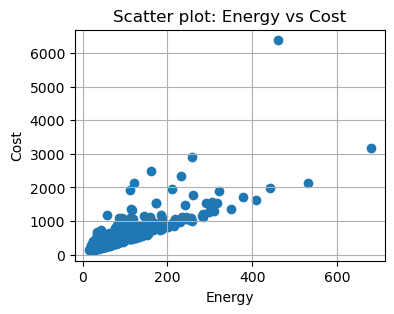

Correlation between Energy and Cost: 0.7737073108953546


In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.figure(figsize=(4, 3))
plt.scatter(combined_data['Energy'], combined_data['cost'])
plt.xlabel('Energy')
plt.ylabel('Cost')
plt.title('Scatter plot: Energy vs Cost')
plt.grid(True)
plt.show()

# Calculate correlation
correlation = np.corrcoef(combined_data['Energy'], combined_data['cost'])[0, 1]
print('Correlation between Energy and Cost:', correlation)


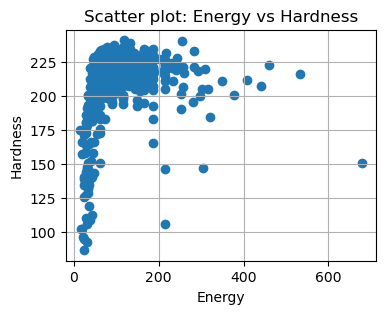

Correlation between Energy and Hardness: 0.2398574635221414


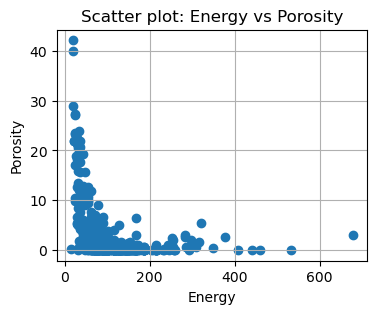

Correlation between Energy and Porosity: -0.35596208684779324


In [76]:
# Scatter plot for Energy vs Hardness
plt.figure(figsize=(4, 3))
plt.scatter(combined_data['Energy'], combined_data['Mean_hardness, HV'])
plt.xlabel('Energy')
plt.ylabel('Hardness')
plt.title('Scatter plot: Energy vs Hardness')
plt.grid(True)
plt.show()

# Calculate correlation for Energy and Hardness
correlation = np.corrcoef(combined_data['Energy'], combined_data['Mean_hardness, HV'])[0, 1]
print('Correlation between Energy and Hardness:', correlation)

# Scatter plot for Energy vs Porosity
plt.figure(figsize=(4, 3))
plt.scatter(combined_data['Energy'], combined_data['porosity, %'])
plt.xlabel('Energy')
plt.ylabel('Porosity')
plt.title('Scatter plot: Energy vs Porosity')
plt.grid(True)
plt.show()

# Calculate correlation for Energy and Porosity
correlation = np.corrcoef(combined_data['Energy'], combined_data['porosity, %'])[0, 1]
print('Correlation between Energy and Porosity:', correlation)


## How to setup experiment using existing configuration and choose next points for evaluation

In [5]:
from autooed.core import *
from autooed.system.config import load_config

config_path = 'hardness_porosity_config.yaml'
config = load_config(config_path)

# Extract X and Y from the init_sample_path
X = np.loadtxt(config['experiment']['init_sample_path'][0], delimiter=',')
Y = np.loadtxt(config['experiment']['init_sample_path'][1], delimiter=',')

# Set random 
random = False

# Call optimize_predict function
X_next, (Y_next_mean, Y_next_std) = optimize_predict(config, X, Y, random=random)

# Print the proposed designs and predicted performance
print("Proposed Designs (X_next):")
print(X_next)
print("Predicted Performance (Y_next_mean):")
print(Y_next_mean)
print("Standard Deviation of Predicted Performance (Y_next_std):")
print(Y_next_std)


Proposed Designs (X_next):
[[2 3 93 989 47 78 8]
 [3 3 85 765 57 65 150]
 [2 4 104 535 94 65 145]
 [2 3 93 972 48 70 5]
 [2 4 105 510 91 65 108]
 [3 3 85 764 57 65 150]
 [3 3 88 755 56 66 150]
 [3 3 81 721 62 65 145]
 [3 3 89 780 56 78 150]
 [2 4 105 519 92 65 134]]
Predicted Performance (Y_next_mean):
[[ 2.22213174e+02 -1.08234163e+00]
 [ 2.31443824e+02 -5.60827434e-01]
 [ 2.34789447e+02 -2.64332719e-01]
 [ 2.22823677e+02 -1.05279493e+00]
 [ 2.35697880e+02 -9.84485369e-02]
 [ 2.31446512e+02 -5.59700229e-01]
 [ 2.31085096e+02 -5.67254426e-01]
 [ 2.32565722e+02 -4.25813443e-01]
 [ 2.30095452e+02 -5.94000109e-01]
 [ 2.35258193e+02 -1.70108671e-01]]
Standard Deviation of Predicted Performance (Y_next_std):
[[16.51979475  2.81036358]
 [14.83076655  2.52567278]
 [13.67618754  2.12001575]
 [16.41677141  2.79150332]
 [13.32126346  2.01136494]
 [14.83197489  2.52600009]
 [16.02195181  2.61396536]
 [11.84970969  2.34813785]
 [16.12522419  2.62790786]
 [13.53010066  2.04618665]]
